<span style='font-size:x-large'><u>**With Rotation**</u></span>


In [1]:
#Code checked: 09/30/2024, Dumi

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
import matplotlib.pyplot as plt
import time

# Load dataset
# Choose file path for the data to load
file_path = 'new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv'
data = pd.read_csv(file_path, delimiter = ",",header=0)

# Display column names in the dataset
print(data.columns)

Index(['mass', 'z', 'fov', 'mlt', 'age', 'log_k', 'teff', 'lum'], dtype='object')

Testing time: 0.13 seconds


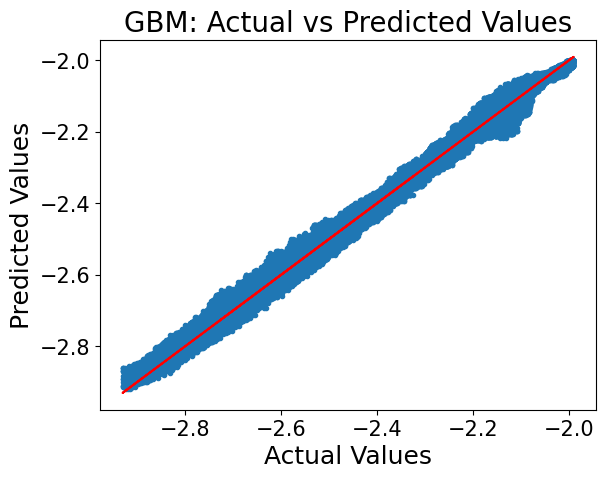

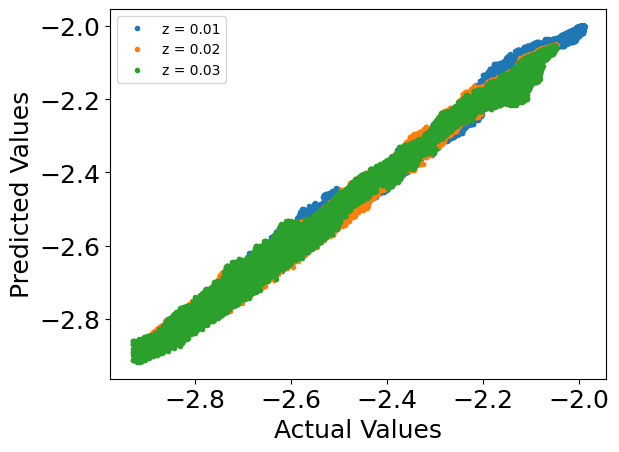

In [2]:
# Training the model

# Define features and target variable
x = data[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = data['log_k']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Build the model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(random_state=123)
model.fit(x_train, y_train)

# Predict using the trained model
start_time = time.time()
predictions = model.predict(x_test)
end_time = time.time()

# Calculate and print testing time
test_time = end_time - start_time
print(f"Testing time: {test_time:.2f} seconds")

# Plot Actual vs Predicted values
fig, ax = plt.subplots()
ax.set_xlabel(r"Actual Values", fontsize=18)
ax.set_ylabel(r"Predicted Values", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Scatter plot of predictions vs actual values
ax.plot(y_test, predictions, '.')
ax.plot(y_test, y_test, color='r')  # Line representing perfect predictions
ax.set_title('GBM: Actual vs Predicted Values', fontsize=20)


# Compare different metallicities
# Plot predictions for different metallicities
results = pd.DataFrame({'y_test': y_test, 'predictions': predictions})
fig, ax = plt.subplots()

# Filter and plot results for z = 0.01, z = 0.02, and z = 0.03
z_01 = np.logical_and(x_test['z'] >= 0.01, x_test['z'] <= 0.01)
ax.plot(results[z_01]['y_test'], results[z_01]['predictions'], '.', label='z = 0.01')

z_02 = np.logical_and(x_test['z'] >= 0.02, x_test['z'] <= 0.02)
ax.plot(results[z_02]['y_test'], results[z_02]['predictions'], '.', label='z = 0.02')

z_03 = np.logical_and(x_test['z'] >= 0.03, x_test['z'] <= 0.03)
ax.plot(results[z_03]['y_test'], results[z_03]['predictions'], '.', label='z = 0.03')

# Set labels, ticks, and legend for the plot
ax.set_xlabel(r"Actual Values", fontsize=18)
ax.set_ylabel(r"Predicted Values", fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend()

In [3]:
# Import evaluation metrics
from sklearn import metrics

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R² Score (model accuracy)
r2 = metrics.r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE) - lower values indicate better performance
mae = metrics.mean_absolute_error(y_test, predictions)

# Print performance metrics
print(f'MSE: {mse:.6f}')
print(f'RMSE: {rmse:.4f}')
print(f'Model Accuracy (R²): {r2 * 100:.2f}%')
print(f'Mean Absolute Error: {mae:.4f}')

MSE: 0.0003
RMSE: 0.0184
Model accuracy is 99.37%
Mean Absolute Error is 0.0139


Text(0, 0.5, 'Frequency')

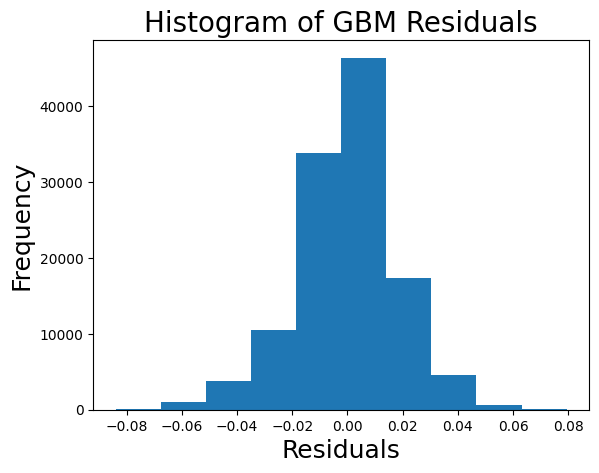

In [15]:
# Plot histogram of residuals (differences between actual and predicted values)
residuals = (y_test - predictions)

# Customize plot appearance
plt.title('Histogram of Decision Tree Residuals', fontsize=20)
plt.xlabel('Residuals', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='both', labelsize=15)

# Optional limit settings (uncomment if needed)
# plt.ylim(0, 500)
# plt.xlim(-0.08, 0.08)

## Feature Importance

age: 0.3852103400516658
teff: 0.3345622779901938
lum: 0.21893928482878783
z: 0.024497236267784606
fov: 0.002931004970511586
mass: 0.0023782103830603863
mlt: 5.153055324960132e-05


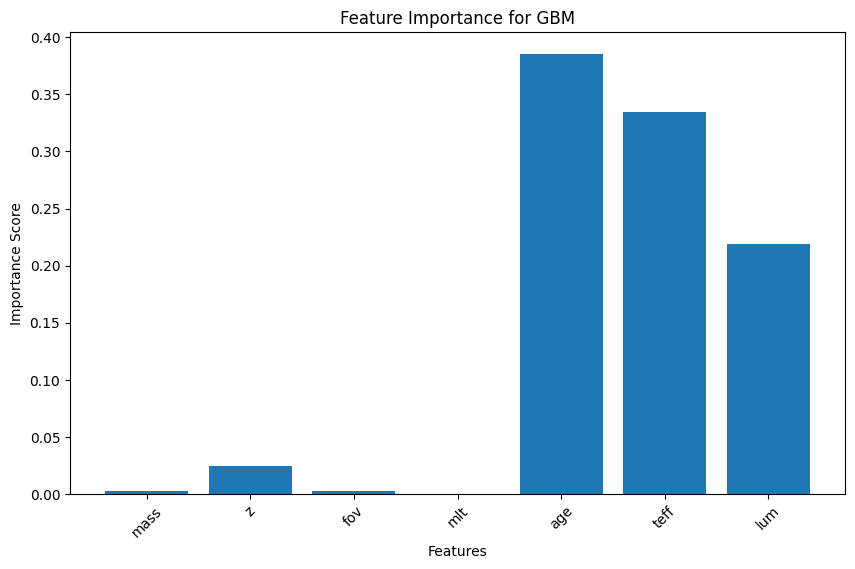

In [4]:
# Import required library for permutation importance
from sklearn.inspection import permutation_importance

# Calculate feature importances using permutation method
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Extract importances and sort them by their mean importance
importances = perm_importance.importances_mean
sorted_idx = importances.argsort()

# Define feature names
features = ['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']

# Print the features with their corresponding importance scores in descending order
for idx in sorted_idx[::-1]:
    print(f"{features[idx]}: {importances[idx]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for GBM')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()


## Recursive Feature Elimination (RFE)

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load dataset
file_path = 'new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv'
data = pd.read_csv(file_path, delimiter=",", header=0)

# Define features and target variable
x = data[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = data['log_k']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=123)

# Initialize Recursive Feature Elimination (RFE) with the model
rfe = RFE(estimator=model, n_features_to_select=1)

# Optionally, use the following line for automatic selection of half the features:
# rfe = RFE(estimator=model) 

# Fit RFE to the training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Print feature ranking (Rank #1 is the best)
print("Feature Ranking:", rfe.ranking_)


Selected Features: Index(['age'], dtype='object')
Feature Ranking: [6 4 5 7 1 2 3]


## SHAP

In [6]:
# Install and import SHAP library
!pip install shap
import shap

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ExactExplainer explainer: 5001it [01:03, 66.55it/s]                                                                                                 


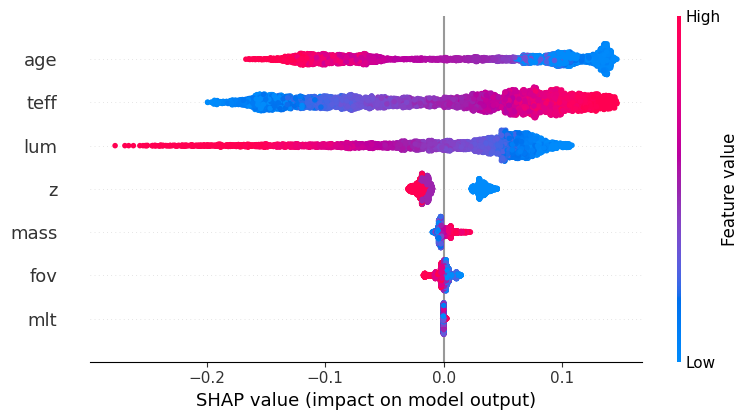

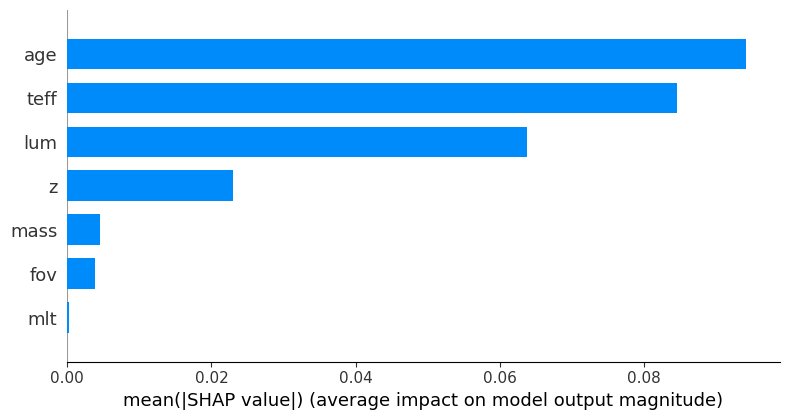

In [7]:
# 10% of the dataset
x_train_sample = x_train.sample(frac=0.1, random_state=42)

# Use KernelExplainer with flattened data
explainer = shap.Explainer(model.predict, x_train_sample[:5000]) 
shap_values = explainer(x_test[:5000])

# Plot SHAP summary and bar chart
shap.summary_plot(shap_values, x_test[:5000], feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'])
shap.summary_plot(shap_values, x_test[:5000], feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'], plot_type="bar")
